# Implementation of Basic Machine Learning Algorithms on Ames Housing Dataset (Regression Task)

This notebook implements Linear Regression on the Ames Housing Dataset. The dataset has been provided by Kaggle. https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from LinearRegression import LinearRegression
%matplotlib inline

initial train data size (1460, 81)
updated training data size (1460, 329)


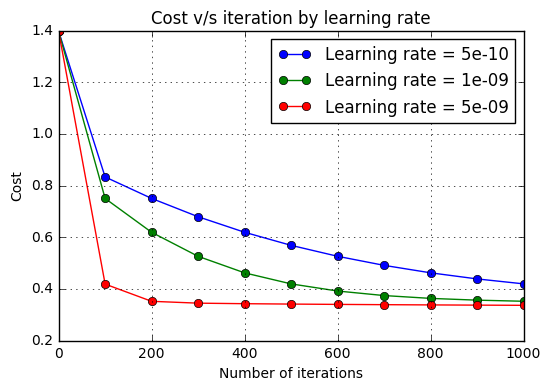

In [31]:
def plot_curve(Xlist, Ylist, title, xlabel, ylabel, plotlabels):
    plt.figure()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    cnt = 0
    for X in Xlist:
        Y = Ylist[cnt]
        label = plotlabels[cnt]
        plt.plot(X, Y, 'o-', label=label)
        cnt += 1
    plt.legend(loc="best")
    plt.show()
    plt.clf()

def load_dataset():
    train_initial = pd.read_csv('datasets/train.csv')
    test_initial = pd.read_csv('datasets/test.csv')
    return train_initial, test_initial

train_initial, test_initial = load_dataset()
print("initial train data size", train_initial.shape)

train_2 = train_initial.copy()

# ignore Id; ignore MasVnrArea and GarageYrBlt too for now as no easy way of handling missing values
train_2 = train_2.drop(['Id', 'MasVnrArea', 'GarageYrBlt'], axis=1)

# transform year variables to be, 'years since 2018'
train_2[['YearBuilt', 'YearRemodAdd', 'YrSold']] = 2018 - train_2[['YearBuilt', 'YearRemodAdd', 'YrSold']]

numeric_features = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice']

# get non-numeric columns
non_numeric_columns = np.setdiff1d(train_2.columns.values,numeric_features)

# create dummy variables for categorical variables
# TODO: ideally would want to create these based on a list of possible feature values,
# otherwise will have to combine with test data and then create dummy variables 
# as some feature values might be present in one set but not the other sample
train_2 = pd.get_dummies(train_2, columns=non_numeric_columns, drop_first=True, dummy_na=True)
print("updated training data size", train_2.shape)

# interaction variable for MiscVal based on type of MiscFeature
miscfeatures = [col for col in train_2.columns.values if col.startswith('MiscFeature')]

train_2[miscfeatures] = train_2[miscfeatures].multiply(train_2['MiscVal'],axis="index")

train_2 = train_2.fillna(train_2.mean())
train_X = train_2.drop(['SalePrice'], axis=1).values
train_y = train_2[['SalePrice']].values
#scaling y variable
train_y = train_y / 100000

learning_rate = [0.0000000005, 0.000000001, 0.000000005]
max_iter = 1000
iteration_threshold = 100

cost_by_lr = np.empty((0,math.floor(max_iter/iteration_threshold)+1))
iterations = np.empty((0,math.floor(max_iter/iteration_threshold)+1))
plotlabels = []

for lr in learning_rate:
    estimator_linReg = LinearRegression(learning_rate=lr, reg_strength=0, regularization="Ridge", 
                                    max_iter=max_iter, gd_threshold=None, iteration_threshold=iteration_threshold)
    estimator_linReg.fit(train_X, train_y)

    cost_by_lr = np.vstack((cost_by_lr, estimator_linReg.cost_by_iteration))
    iterations = np.vstack((iterations, estimator_linReg.iterations))
    plotlabels.append("Learning rate = "+str(lr))

plot_curve(Ylist=cost_by_lr, Xlist=iterations, title="Cost v/s iteration by learning rate", 
           xlabel="Number of iterations", ylabel="Cost", plotlabels=plotlabels)